In [ ]:
from zipfile import ZipFile
import os

# Upload archive.zip manually via Colab file browser first
zip_path = "archive.zip"
extract_path = "/content/skintone_dataset"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check structure
os.listdir(extract_path)

['train']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

In [ ]:
train_path = '/content/skintone_dataset/train'

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

In [ ]:
def build_skin_tone_model():
    model = Sequential([
        Input(shape=(224, 224, 3)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # 3 classes: Black, Brown, White
    ])
    return model

In [ ]:
model = build_skin_tone_model()

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    LearningRateScheduler(lr_scheduler),
    EarlyStopping(patience=5, restore_best_weights=True)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks,
    verbose=1
)

D:\Admin\Desktop\Testing\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.4234 - loss: 14.4192 - val_accuracy: 0.3333 - val_loss: 1.0953 - learning_rate: 1.0000e-04
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.5739 - loss: 2.3163 - val_accuracy: 0.5000 - val_loss: 1.1195 - learning_rate: 1.0000e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.6366 - loss: 1.2038 - val_accuracy: 0.3333 - val_loss: 1.3014 - learning_rate: 1.0000e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.5732 - loss: 1.2052 - val_accuracy: 0.3333 - val_loss: 1.4428 - learning_rate: 1.0000e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.6114 - loss: 1.1231 - val_accuracy: 0.3333 - val_loss: 1.1265 - learning_rate: 1.0000e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.6368 - loss: 0.8744 - val_accuracy: 0.5133 - val_loss: 1.0200 - learning_rate: 1.0000e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.6832

In [ ]:
# Evaluate the Model
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"Validation Accuracy: {val_acc:.2%}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 625ms/step - accuracy: 0.4824 - loss: 0.9985
Validation Accuracy: 49.67%


In [ ]:
# Define the path inside your Google Drive
save_path = "vgg16_skin_tone.h5"

# Save the model
model.save(save_path)

print(f"Model saved to: {save_path}")


Model saved to: vgg16_skin_tone.h5


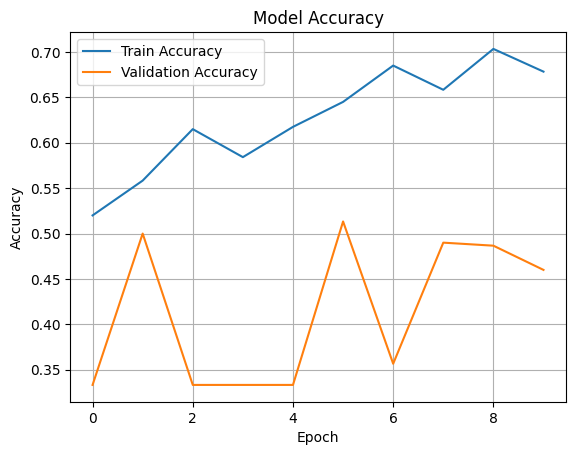

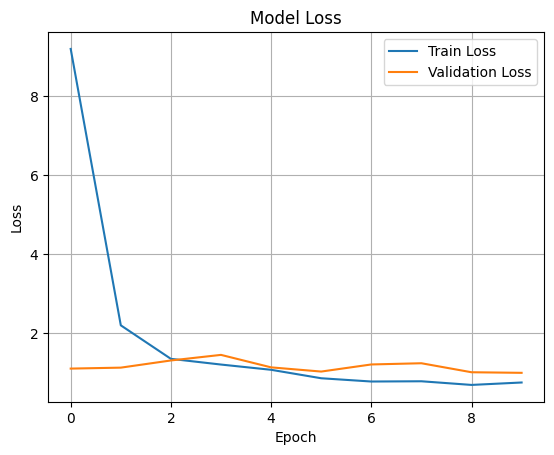

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Extracted folders/files: ['train']
Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


D:\Admin\Desktop\Testing\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


D:\Admin\Desktop\Testing\.venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_272']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 788ms/step - accuracy: 0.3753 - loss: 2.8033 - val_accuracy: 0.5967 - val_loss: 0.8783 - learning_rate: 5.0000e-04
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 800ms/step - accuracy: 0.5867 - loss: 0.8622 - val_accuracy: 0.5800 - val_loss: 0.8283 - learning_rate: 5.0000e-04
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 804ms/step - accuracy: 0.6212 - loss: 0.8000 - val_accuracy: 0.6067 - val_loss: 0.8117 - learning_rate: 5.0000e-04
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 803ms/step - accuracy: 0.6091 - loss: 0.8369 - val_accuracy: 0.6300 - val_loss: 0.7790 - learning_rate: 5.0000e-04
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 800ms/step - accuracy: 0.6565 - loss: 0.7630 - val_accuracy: 0.6267 - val_loss: 0.8003 - learning_rate: 5.0000e-04
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 804ms/step - accuracy: 0.6524 - loss: 0.7697 - val_accuracy: 0.6600 - val_loss: 0.7803 - learning_rate: 5.0000e-04
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 806ms/step - accuracy: 0.67

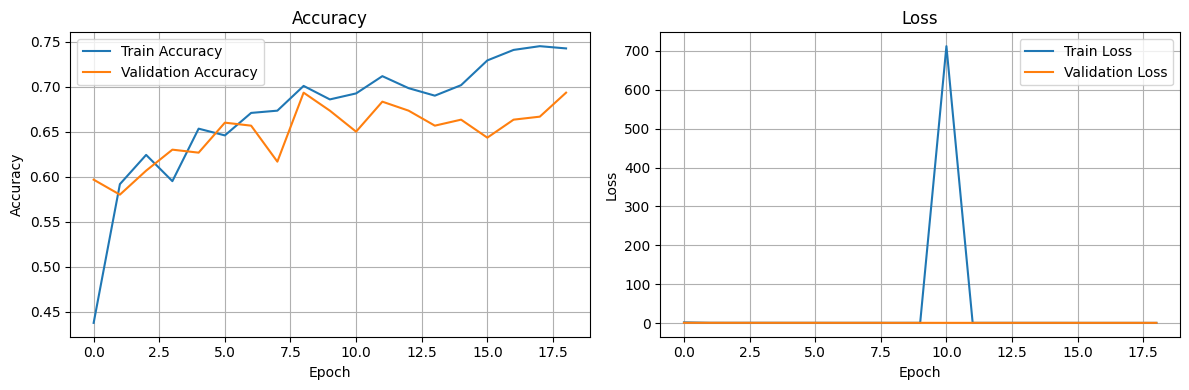

In [ ]:
# ========== 1. Extract Dataset ==========
from zipfile import ZipFile
import os

zip_path = "archive.zip"  # Upload via Colab sidebar
extract_path = "/content/skintone_dataset"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted folders/files:", os.listdir(extract_path))


# ========== 2. Import Libraries ==========
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import VGG16
from sklearn.utils.class_weight import compute_class_weight


# ========== 3. Data Augmentation ==========
train_path = os.path.join(extract_path, 'train')

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.7, 1.4],
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


# ========== 4. Handle Class Imbalance ==========
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights = dict(enumerate(class_weights))


# ========== 5. Load Pretrained VGG16 Model ==========
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
base_model.trainable = False  # Freeze pretrained layers

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # 3 skin tone classes

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# ========== 6. Callbacks ==========
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
]


# ========== 7. Training ==========
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)


# ========== 8. Evaluation ==========
val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print(f"✅ Final Validation Accuracy: {val_acc:.2%}")


# ========== 9. Visualization ==========
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from zipfile import ZipFile
import os

zip_path = "archive.zip"  # replace with new uploaded zip filename
extract_path = "/content/skintone_dataset"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted folders:", os.listdir(extract_path))


✅ Extracted folders: ['train']


In [ ]:
import os
print("Subfolders in /train:", os.listdir(os.path.join(extract_path, "train")))


Subfolders in /train: ['Brown', 'White', 'Black']


Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.

✅ Class indices: {'dark': 0, 'light': 1, 'medium': 2}
📊 Train distribution: {np.int32(0): 400, np.int32(1): 400, np.int32(2): 400}
📊 Val distribution: {np.int32(0): 100, np.int32(1): 100, np.int32(2): 100}
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,561,795 (105.14 MB)

 Trainable params: 12,847,107 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_725']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 680ms/step - accuracy: 0.3744 - loss: 3.1019
Epoch 1: val_accuracy improved from -inf to 0.48000, saving model to best.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.3756 - loss: 3.0805 - val_accuracy: 0.4800 - val_loss: 1.0427 - learning_rate: 5.0000e-04
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.5033 - loss: 0.9487
Epoch 2: val_accuracy improved from 0.48000 to 0.61667, saving model to best.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 592ms/step - accuracy: 0.5042 - loss: 0.9478 - val_accuracy: 0.6167 - val_loss: 0.8493 - learning_rate: 5.0000e-04
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.5669 - loss: 0.8717
Epoch 3: val_accuracy did not improve from 0.61667
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 607ms/step - accuracy: 0.5675 - loss: 0.8713 - val_accuracy: 0.5900 - val_loss: 0.8091 - learning_rate: 5.0000e-04
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.6047 - loss: 0.8697
Epoch 4: val_accuracy did not improve from 0.61667
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 605ms/step - accuracy: 0.6052 - loss: 0.8686 - val_accuracy: 0.5933 - val_loss: 0.8024 - learning_rate: 5.0000e-04
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.6278 - loss: 0.7818
Epoch 5: val_accuracy improved from 0.61667 to 0.63000, saving model to best.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 626ms/step - accuracy: 0.6281 - loss: 0.7819 - val_accuracy: 0.6300 - val_loss: 0.7838 - learning_rate: 5.0000e-04
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.6372 - loss: 0.7618
Epoch 6: val_accuracy improved from 0.63000 to 0.63333, saving model to best.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 607ms/step - accuracy: 0.6373 - loss: 0.7622 - val_accuracy: 0.6333 - val_loss: 0.7571 - learning_rate: 5.0000e-04
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.6776 - loss: 0.7187
Epoch 7: val_accuracy improved from 0.63333 to 0.68333, saving model to best.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 609ms/step - accuracy: 0.6774 - loss: 0.7189 - val_accuracy: 0.6833 - val_loss: 0.7428 - learning_rate: 5.0000e-04
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.6536 - loss: 0.7616
Epoch 8: val_accuracy did not improve from 0.68333
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 565ms/step - accuracy: 0.6534 - loss: 0.7616 - val_accuracy: 0.6233 - val_loss: 0.7676 - learning_rate: 5.0000e-04
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.6755 - loss: 0.7465
Epoch 9: val_accuracy did not improve from 0.68333
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 597ms/step - accuracy: 0.6753 - loss: 0.7465 - val_accuracy: 0.6200 - val_loss: 0.7632 - learning_rate: 5.0000e-04
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.6951 - loss: 0.7050
Epoch 10: val_accuracy did not improve from 0.68333
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 587ms/step - accuracy: 0.6950 - loss: 0.7048 - val_accuracy: 0.6733 - val_loss: 0.7072 - learning_rate: 5.0000e-04
Epo

38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 607ms/step - accuracy: 0.6620 - loss: 0.7145 - val_accuracy: 0.7033 - val_loss: 0.6845 - learning_rate: 5.0000e-04
Epoch 13/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.7295 - loss: 0.6542
Epoch 13: val_accuracy did not improve from 0.70333
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 585ms/step - accuracy: 0.7287 - loss: 0.6548 - val_accuracy: 0.6467 - val_loss: 0.7334 - learning_rate: 5.0000e-04
Epoch 14/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.6796 - loss: 0.6688
Epoch 14: val_accuracy did not improve from 0.70333
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 595ms/step - accuracy: 0.6797 - loss: 0.6692 - val_accuracy: 0.6733 - val_loss: 0.7523 - learning_rate: 5.0000e-04
Epoch 15/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.6943 - loss: 0.6799
Epoch 15: val_accuracy did not improve from 0.70333

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 581ms/step - accuracy: 0.6942 - los


Epoch 27: ReduceLROnPlateau reducing learning rate to 8.000000889296644e-07.
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 600ms/step - accuracy: 0.7170 - loss: 0.6199 - val_accuracy: 0.7167 - val_loss: 0.6859 - learning_rate: 4.0000e-06
Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 21.

✅ Final validation accuracy: 72.00%


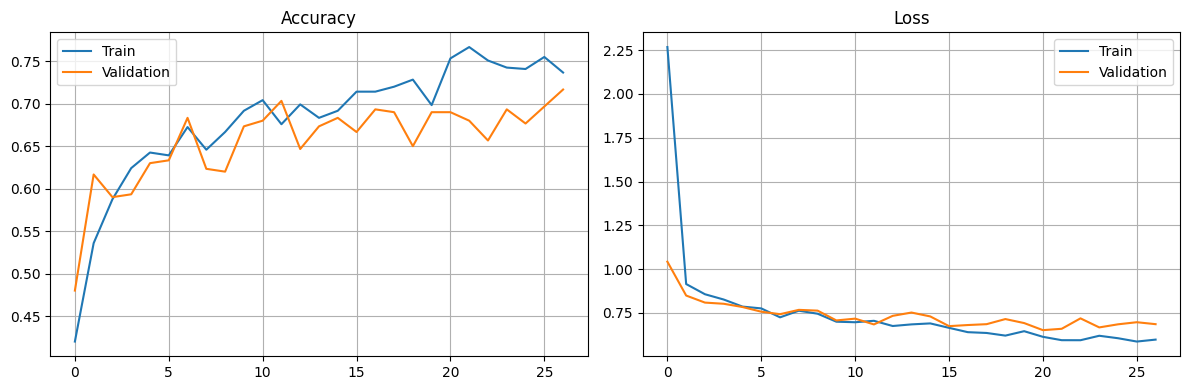

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_725']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


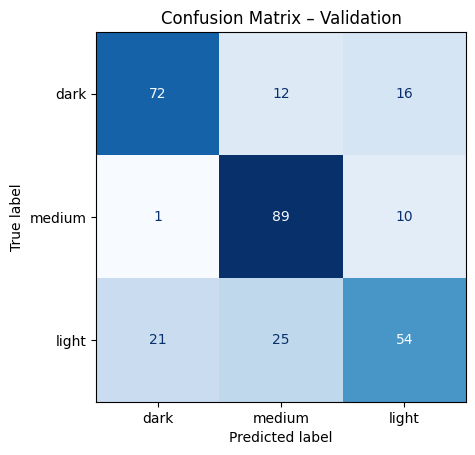

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

# ===========================================================
# 3. Data Generators
# ===========================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
VAL_SPLIT = 0.2

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VAL_SPLIT,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.7, 1.4],
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    f"{extract_path}/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

val_gen = datagen.flow_from_directory(
    f"{extract_path}/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
)

print("\n✅ Class indices:", train_gen.class_indices)
print("📊 Train distribution:", dict(Counter(train_gen.classes)))
print("📊 Val distribution:", dict(Counter(val_gen.classes)))

# ===========================================================
# 4. Compute Class Weights
# ===========================================================
class_weights = dict(enumerate(compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)))

# ===========================================================
# 5. Build VGG16 Model
# ===========================================================
def build_vgg_model(input_shape=(224, 224, 3), num_classes=3):
    base_model = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=input_shape))
    base_model.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_vgg_model()
model.summary()

# ===========================================================
# 6. Callbacks
# ===========================================================
callbacks = [
    ModelCheckpoint("best.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, verbose=1),
    EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=1)
]

# ===========================================================
# 7. Train the Model
# ===========================================================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# ===========================================================
# 8. Evaluation and Visualization
# ===========================================================
val_loss, val_acc = model.evaluate(val_gen, verbose=0)
print(f"\n✅ Final validation accuracy: {val_acc:.2%}")

# Plot training curves
def plot_history(hist):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train')
    plt.plot(hist.history['val_accuracy'], label='Validation')
    plt.title("Accuracy")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train')
    plt.plot(hist.history['val_loss'], label='Validation')
    plt.title("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_history(history)

# Confusion matrix
val_gen.reset()
preds = model.predict(val_gen, verbose=0)
y_true = val_gen.classes
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["dark", "medium", "light"])
disp.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix – Validation")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/skin_tone_model.keras')


In [ ]:
model.save('/content/drive/MyDrive/skin_tone_model.h5')


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from zipfile import ZipFile
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
✅ Class indices: {'dark': 0, 'light': 1, 'medium': 2}
📊 Train distribution: {np.int32(0): 400, np.int32(1): 400, np.int32(2): 400}
📊 Val distribution: {np.int32(0): 100, np.int32(1): 100, np.int32(2): 100}


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25088)          │       100,352 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 27,662,147 (105.52 MB)

 Trainable params: 12,897,283 (49.20 MB)

 Non-trainable params: 14,764,864 (56.32 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_796']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.5032 - loss: 2.6332
Epoch 1: val_accuracy improved from -inf to 0.53000, saving model to best.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 742ms/step - accuracy: 0.5040 - loss: 2.6432 - val_accuracy: 0.5300 - val_loss: 1.2643 - learning_rate: 5.0000e-04
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.6422 - loss: 2.4043
Epoch 2: val_accuracy improved from 0.53000 to 0.59333, saving model to best.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 624ms/step - accuracy: 0.6422 - loss: 2.4052 - val_accuracy: 0.5933 - val_loss: 1.2775 - learning_rate: 5.0000e-04
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.6905 - loss: 1.9261
Epoch 3: val_accuracy improved from 0.59333 to 0.60000, saving model to best.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 671ms/step - accuracy: 0.6901 - loss: 1.9287 - val_accuracy: 0.6000 - val_loss: 1.0912 - learning_rate: 5.0000e-04
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.6602 - loss: 2.0948
Epoch 4: val_accuracy improved from 0.60000 to 0.65000, saving model to best.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 664ms/step - accuracy: 0.6603 - loss: 2.0962 - val_accuracy: 0.6500 - val_loss: 0.9127 - learning_rate: 5.0000e-04
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.7252 - loss: 1.4566
Epoch 5: val_accuracy did not improve from 0.65000
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 607ms/step - accuracy: 0.7246 - loss: 1.4617 - val_accuracy: 0.5900 - val_loss: 1.1822 - learning_rate: 5.0000e-04
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.6761 - loss: 1.6379
Epoch 6: val_accuracy did not improve from 0.65000
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 582ms/step - accuracy: 0.6763 - loss: 1.6348 - val_accuracy: 0.6500 - val_loss: 0.9365 - learning_rate: 5.0000e-04
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.6993 - loss: 1.1449
Epoch 7: val_accuracy improved from 0.65000 to 0.66333, saving model to best.h5



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 629ms/step - accuracy: 0.6994 - loss: 1.1447 - val_accuracy: 0.6633 - val_loss: 0.9978 - learning_rate: 5.0000e-04
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.7241 - loss: 1.0099
Epoch 8: val_accuracy did not improve from 0.66333
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 613ms/step - accuracy: 0.7243 - loss: 1.0087 - val_accuracy: 0.6367 - val_loss: 1.0519 - learning_rate: 1.0000e-04
Epoch 9/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.7373 - loss: 0.9223
Epoch 9: val_accuracy improved from 0.66333 to 0.67333, saving model to best.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 624ms/step - accuracy: 0.7372 - loss: 0.9221 - val_accuracy: 0.6733 - val_loss: 0.9671 - learning_rate: 1.0000e-04
Epoch 10/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.7295 - loss: 0.9005
Epoch 10: val_accuracy did not improve from 0.67333

Epoch 10: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 646ms/step - accuracy: 0.7296 - loss: 0.8993 - val_accuracy: 0.6700 - val_loss: 0.9875 - learning_rate: 1.0000e-04
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 4.

✅ Final validation accuracy: 63.00%


KeyError: 'accuracy'

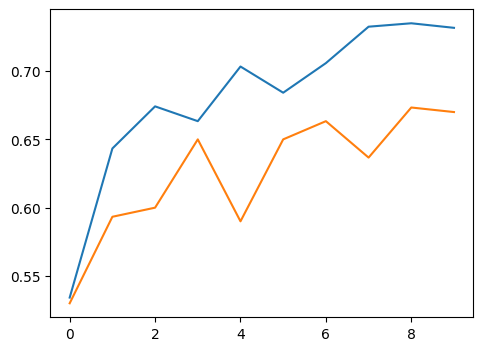

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
VAL_SPLIT = 0.2

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VAL_SPLIT,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.7, 1.4],
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    f"{extract_path}/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    f"{extract_path}/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("✅ Class indices:", train_gen.class_indices)
print("📊 Train distribution:", dict(Counter(train_gen.classes)))
print("📊 Val distribution:", dict(Counter(val_gen.classes)))

# ===========================================================
# 4. Class Weights
# ===========================================================
class_weights = dict(enumerate(compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)))

# ===========================================================
# 5. Build VGG16 Model (returns model + base_model)
# ===========================================================
def build_vgg16_model(input_shape=(224, 224, 3), num_classes=3):
    base_model = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=input_shape))
    base_model.trainable = False
    x = Flatten()(base_model.output)
    x = BatchNormalization()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=base_model.input, outputs=out)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])
    return model, base_model

model, base_model = build_vgg16_model()
model.summary()

# ===========================================================
# 6. Callbacks
# ===========================================================
callbacks = [
    ModelCheckpoint("best.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, verbose=1),
    EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=1),
]

# ===========================================================
# 7. Phase 1: Train Frozen VGG16
# ===========================================================
history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# ===========================================================
# 8. Phase 2: Fine-Tune Top Layers of VGG16
# ===========================================================
# Unfreeze top 2 convolutional blocks (~last 8 layers)
for layer in base_model.layers[-8:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    initial_epoch=history1.epoch[-1] + 1,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# ===========================================================
# 9. Evaluation and Plots
# ===========================================================
val_loss, val_acc = model.evaluate(val_gen, verbose=0)
print(f"\n✅ Final validation accuracy: {val_acc:.2%}")

def plot_history(histories):
    plt.figure(figsize=(12, 4))
    for h in histories:
        plt.subplot(1, 2, 1)
        plt.plot(h.history['accuracy'])
        plt.plot(h.history['val_accuracy'])
    plt.title("Accuracy")
    plt.legend(['Train', 'Val'])
    plt.grid()

    for h in histories:
        plt.subplot(1, 2, 2)
        plt.plot(h.history['loss'])
        plt.plot(h.history['val_loss'])
    plt.title("Loss")
    plt.legend(['Train', 'Val'])
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_history([history1, history2])

# Confusion matrix
val_gen.reset()
preds = model.predict(val_gen, verbose=0)
y_true = val_gen.classes
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["dark", "medium", "light"])
disp.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix – Validation")
plt.show()

✅ Dataset extracted to /content/dataset_folder
Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
✅ Class indices: {'Black': 0, 'Brown': 1, 'White': 2}
📊 Train distribution: {np.int32(0): 400, np.int32(1): 400, np.int32(2): 400}
📊 Val distribution: {np.int32(0): 100, np.int32(1): 100, np.int32(2): 100}
82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 300, 300,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │        648 │ rescaling[0][0]   │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 150, 150,  │      5,184 │ stem_activation[… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 150, 150,  │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 150, 150,  │          0 │ block1a_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 150, 150,  │          0 │ block1a_project_… │
│                     │ 24)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 150, 150,  │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 150, 150,  │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 150, 150,  │          0 │ block1b_project_… │
│ (Activation)        │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 150, 150,  │          0 │ block1b_project_… │
│ (Dropout)           │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 150, 150,  │          0 │ block1b_drop[0][… │
│                     │ 24)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 75, 75,    │     20,736 │ block1b_add[0][0] │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 75, 75,    │        384 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 75, 75,    │          0 │ block2a_expand_b

 Total params: 20,993,891 (80.09 MB)

 Trainable params: 659,971 (2.52 MB)

 Non-trainable params: 20,333,920 (77.57 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 300, 300, 3))
  warnings.warn(msg)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5329 - loss: 1.3463
Epoch 1: val_accuracy improved from -inf to 0.62333, saving model to best_efficientnetv2s.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5345 - loss: 1.3435 - val_accuracy: 0.6233 - val_loss: 0.8176
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - accuracy: 0.6484 - loss: 1.0412
Epoch 2: val_accuracy improved from 0.62333 to 0.70667, saving model to best_efficientnetv2s.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.6480 - loss: 1.0434 - val_accuracy: 0.7067 - val_loss: 0.7370
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.6687 - loss: 1.0113
Epoch 3: val_accuracy did not improve from 0.70667
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6688 - loss: 1.0112 - val_accuracy: 0.6600 - val_loss: 0.6975
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 871ms/step - accuracy: 0.6887 - loss: 0.9320
Epoch 4: val_accuracy did not improve from 0.70667
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6894 - loss: 0.9297 - val_accuracy: 0.6900 - val_loss: 0.6513
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.7186 - loss: 0.8297
Epoch 5: val_accuracy did not improve from 0.70667
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7189 - loss: 0.8280 - val_accuracy: 0.6767 - val_loss: 0.7013
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.7423 - loss: 0.7298
Epoch 6: val_accuracy improved from 0.70667

38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7422 - loss: 0.7301 - val_accuracy: 0.7133 - val_loss: 0.6437
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.7505 - loss: 0.7172
Epoch 7: val_accuracy improved from 0.71333 to 0.73333, saving model to best_efficientnetv2s.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7501 - loss: 0.7170 - val_accuracy: 0.7333 - val_loss: 0.5909
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.7527 - loss: 0.6678
Epoch 8: val_accuracy did not improve from 0.73333
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7527 - loss: 0.6676 - val_accuracy: 0.7067 - val_loss: 0.6403
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.7557 - loss: 0.5853
Epoch 9: val_accuracy improved from 0.73333 to 0.75000, saving model to best_efficientnetv2s.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7559 - loss: 0.5849 - val_accuracy: 0.7500 - val_loss: 0.6019
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.7502 - loss: 0.6014
Epoch 10: val_accuracy did not improve from 0.75000
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7504 - loss: 0.6017 - val_accuracy: 0.6567 - val_loss: 0.7534
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.7123 - loss: 0.7212
Epoch 11: val_accuracy improved from 0.75000 to 0.78667, saving model to best_efficientnetv2s.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7128 - loss: 0.7203 - val_accuracy: 0.7867 - val_loss: 0.4941
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 901ms/step - accuracy: 0.7629 - loss: 0.5914
Epoch 12: val_accuracy did not improve from 0.78667
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7633 - loss: 0.5902 - val_accuracy: 0.6933 - val_loss: 0.7688
Epoch 13/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 929ms/step - accuracy: 0.7562 - loss: 0.6638
Epoch 13: val_accuracy did not improve from 0.78667
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7565 - loss: 0.6620 - val_accuracy: 0.7333 - val_loss: 0.5925
Epoch 14/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 934ms/step - accuracy: 0.7664 - loss: 0.5796
Epoch 14: val_accuracy did not improve from 0.78667
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7664 - loss: 0.5796 - val_accuracy: 0.7600 - val_loss: 0.5821
Epoch 15/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.7680 - loss: 0.5380
Epoch 15: val_accuracy did not impro

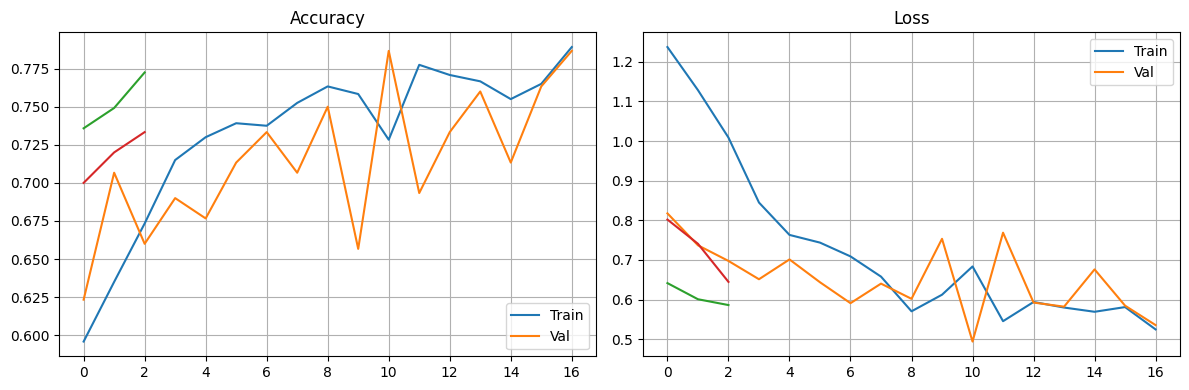

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 300, 300, 3))
  warnings.warn(msg)


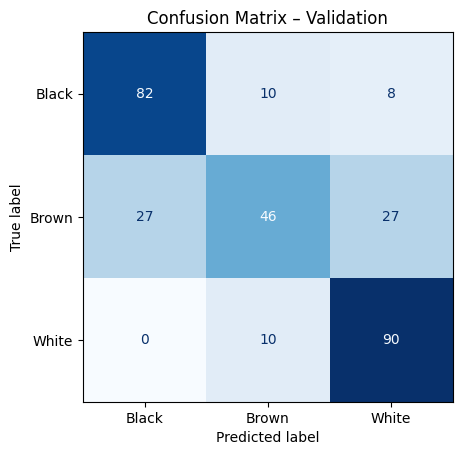

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ===========================================================
# 1. Extract dataset
# ===========================================================
extract_path = os.path.join(os.getcwd(), "dataset_folder")
if not os.path.exists(extract_path):
    with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"✅ Dataset extracted to {extract_path}")
else:
    print(f"✅ Dataset already exists at {extract_path}")

# ===========================================================
# 2. Parameters
# ===========================================================
IMG_SIZE = (300, 300)  # ✅ Best for EfficientNet
BATCH_SIZE = 32
VAL_SPLIT = 0.2

# ===========================================================
# 3. Stronger Augmentation
# ===========================================================
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=VAL_SPLIT,
    rotation_range=40,
    shear_range=0.3,
    zoom_range=(0.6, 1.4),
    width_shift_range=0.3,
    height_shift_range=0.3,
    channel_shift_range=30.0,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    os.path.join(extract_path, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    os.path.join(extract_path, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("✅ Class indices:", train_gen.class_indices)
print("📊 Train distribution:", dict(Counter(train_gen.classes)))
print("📊 Val distribution:", dict(Counter(val_gen.classes)))

# ===========================================================
# 4. Class Weights
# ===========================================================
class_weights = dict(enumerate(compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)))

# ===========================================================
# 5. Build EfficientNetV2S Model
# ===========================================================
def build_efficientnetv2_model(input_shape=(300, 300, 3), num_classes=3):
    base_model = EfficientNetV2S(weights="imagenet", include_top=False, input_tensor=Input(shape=input_shape))
    base_model.trainable = False
    x = GlobalAveragePooling2D()(base_model.output)
    x = BatchNormalization()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(num_classes, activation="softmax")(x)

    from tensorflow.keras.optimizers.schedules import CosineDecay
    lr_schedule = CosineDecay(initial_learning_rate=0.001, decay_steps=10000)
    model = Model(inputs=base_model.input, outputs=out)
    model.compile(optimizer=Adam(learning_rate=lr_schedule), loss="categorical_crossentropy", metrics=["accuracy"])
    return model, base_model

model, base_model = build_efficientnetv2_model()
model.summary()

# ===========================================================
# 6. Callbacks
# ===========================================================
callbacks = [
    ModelCheckpoint("best_efficientnetv2s.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1),
    EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=1)
]

# ===========================================================
# 7. Phase 1: Train Frozen Model
# ===========================================================
history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,  # ✅ More epochs
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# ===========================================================
# 8. Phase 2: Fine-Tune more layers
# ===========================================================
for layer in base_model.layers[-60:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,  # ✅ More epochs
    initial_epoch=history1.epoch[-1] + 1,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# ===========================================================
# 9. Evaluation
# ===========================================================
val_loss, val_acc = model.evaluate(val_gen, verbose=0)
print(f"\n✅ Final validation accuracy: {val_acc:.2%}")

def plot_history(histories):
    plt.figure(figsize=(12, 4))
    for h in histories:
        plt.subplot(1, 2, 1)
        plt.plot(h.history['accuracy'])
        plt.plot(h.history['val_accuracy'])
    plt.title("Accuracy")
    plt.legend(['Train', 'Val'])
    plt.grid()

    for h in histories:
        plt.subplot(1, 2, 2)
        plt.plot(h.history['loss'])
        plt.plot(h.history['val_loss'])
    plt.title("Loss")
    plt.legend(['Train', 'Val'])
    plt.grid()
    plt.tight_layout()
    plt.show()

plot_history([history1, history2])

# ===========================================================
# 10. Confusion Matrix
# ===========================================================
val_gen.reset()
preds = model.predict(val_gen, verbose=0)
y_true = val_gen.classes
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=list(train_gen.class_indices.keys()))
disp.plot(cmap="Blues", colorbar=False)
plt.title("Confusion Matrix – Validation")
plt.show()

# ===========================================================
# 11. OPTIONAL TTA Function (+2% boost)
# ===========================================================
def predict_with_tta(model, generator, tta_steps=5):
    preds_tta = np.zeros((generator.samples, generator.num_classes))
    for i in range(tta_steps):
        generator.reset()
        preds_tta += model.predict(generator, verbose=0)
    preds_tta /= tta_steps
    return preds_tta

# Example usage:
# preds_tta = predict_with_tta(model, val_gen, tta_steps=5)
# y_pred_tta = np.argmax(preds_tta, axis=1)
# cm = confusion_matrix(y_true, y_pred_tta)
# disp = ConfusionMatrixDisplay(cm, display_labels=list(train_gen.class_indices.keys()))
# disp.plot(cmap="Blues", colorbar=False)
# plt.title("TTA Confusion Matrix – Validation")
# plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

model_path = "/content/drive/MyDrive/personal_color/best_efficientnetv2s.h5"
model.save(model_path)
print(f"\u2705 Model saved to: {model_path}")


✅ Model saved to: /content/drive/MyDrive/personal_color/best_efficientnetv2s.h5
